In [1]:
#INFO 212
#Shuyi Gu
# This is my Titanic Practice
#The starter code are from INFO 212 Class W5, W7, W8 Lecture at beginning of Wrangling/Visualization/Modeling
#I looked https://www.kaggle.com/startupsci/titanic-data-science-solutions for some idea in modeling since I don't
#have much knowledge on machine learning.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [2]:
train = pd.read_csv("./train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('./test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.shape

(891, 12)

## Data Wrangling and Cleaning
### I use some code from class at beginning, and imitate the way for mapping string val to number

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Some columns' value can be represented by number which is better for future modeling. Let's do this for test and train!

In [8]:
train['Sex'] = train.Sex.map({'male': 0, 'female': 1})
train['Embarked'] = train.Embarked.map({'S':0, 'C':1, 'Q':2})
test['Sex'] = test.Sex.map({'male': 0, 'female': 1})
test['Embarked'] = test.Embarked.map({'S':0, 'C':1, 'Q':2})

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [10]:
train.describe(include=['O'])

,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Razi, Mr. Raihed",1601,C23 C25 C27
freq,1,7,4


**My Code Start from Here**

Before I start wrangling, I want to do some data cleaning and filling. Let's check the null values in train&test

In [11]:
#Checking if there are any null
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Most cabin value are missing. Lots of Age values needs to be filled. The Embarked column has 2 values missing, we can use mode to fill them.

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Similar situation happen for test data. We need to fill Age column, and 1 value for Fare column. Since there are too many value missing for Cabin, I'm going to drop it.

Let's drop the ticket and Cabin feature since they seems not really useful and Cabin has lots of missing values

In [13]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

Let's fill the train Embark by the mode of Embarked from train since there are only 2 values that need to be filled

In [14]:
train['Embarked'].fillna(train['Embarked'].mode().iloc[0], inplace=True)

In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

I'm going to fill the age later. Let's extract the name title first since the name title represent the person's social reputation which may have effect on his surviving rate

In [16]:
#From Week 7 Lecture, extract titles, based on what we did on W7, do some modification
titles = train.Name.str.extract(r'( [A-Za-z]+\.)')
titles[0].value_counts()
train['titles'] = titles[0].str.strip()
train['titles'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Don.           1
Ms.            1
Countess.      1
Mme.           1
Sir.           1
Lady.          1
Jonkheer.      1
Capt.          1
Name: titles, dtype: int64

In [17]:
#Do the same for test
titles = test.Name.str.extract(r'( [A-Za-z]+\.)')
titles[0].value_counts()
test['titles'] = titles[0].str.strip()
test['titles'].value_counts()

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Dr.          1
Dona.        1
Ms.          1
Name: titles, dtype: int64

After initially extrat the title, I want to use this to do the filling for Age for both train and test.
For here, I'm going to use the average of the age by title to fill the missing age data. I'll show some example here

In [18]:
train.groupby('titles').transform(np.mean).head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,454.499033,0.156673,2.410058,0.0,32.368090,0.288201,0.152805,24.441560,0.299807
1,453.160000,0.792000,2.000000,1.0,35.898148,0.696000,0.832000,45.138533,0.296000
2,408.884615,0.697802,2.307692,1.0,21.773973,0.714286,0.549451,43.797873,0.571429
3,453.160000,0.792000,2.000000,1.0,35.898148,0.696000,0.832000,45.138533,0.296000
4,454.499033,0.156673,2.410058,0.0,32.368090,0.288201,0.152805,24.441560,0.299807


In [19]:
test.groupby('titles').transform(np.mean).head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1101.279167,2.320833,0,32.000000,0.270833,0.175000,25.563302,0.400000
1,1090.097222,1.833333,1,38.903226,0.597222,0.833333,59.974249,0.416667
2,1101.279167,2.320833,0,32.000000,0.270833,0.175000,25.563302,0.400000
3,1101.279167,2.320833,0,32.000000,0.270833,0.175000,25.563302,0.400000
4,1090.097222,1.833333,1,38.903226,0.597222,0.833333,59.974249,0.416667


In [20]:
train.groupby('titles').describe()

PassengerId                                                        \
                count        mean         std    min     25%    50%     75%   
titles                                                                        
Capt.             1.0  746.000000         NaN  746.0  746.00  746.0  746.00   
Col.              2.0  671.500000   33.234019  648.0  659.75  671.5  683.25   
Countess.         1.0  760.000000         NaN  760.0  760.00  760.0  760.00   
Don.              1.0   31.000000         NaN   31.0   31.00   31.0   31.00   
Dr.               7.0  545.857143  222.196931  246.0  358.50  633.0  714.00   
Jonkheer.         1.0  823.000000         NaN  823.0  823.00  823.0  823.00   
Lady.             1.0  557.000000         NaN  557.0  557.00  557.0  557.00   
Major.            2.0  493.500000   61.518290  450.0  471.75  493.5  515.25   
Master.          40.0  414.975000  301.717518    8.0  165.75  345.0  764.00   
Miss.           182.0  408.884615  246.775812    3.0  213.00  381.5  612.25   
Mlle.             2.0  676.500000   48.790368  642.0  659.25  676.5  693.75   
Mme.              1.0  370.000000         NaN  370.0  370.00  370.0  370.00   
Mr.             517.0  454.499033  253.715526    1.0  226.00  466.0  674.00   
Mrs.            125.0  453.160000  270.762764    2.0  255.00  438.0  679.00   
Ms.               1.0  444.000000         NaN  444.0  444.00  444.0  444.00   
Rev.              6.0  485.666667  344.461125  150.0  175.75  438.5  793.50   
Sir.              1.0  600.000000         NaN  600.0  600.00  600.0  600.00   

                 Survived            ...       Fare           Embarked  \
             max    count      mean  ...        75%       max    count   
titles                               ...                                 
Capt.      746.0      1.0  0.000000  ...  71.000000   71.0000      1.0   
Col.       695.0      2.0  0.500000  ...  33.262500   35.5000      2.0   
Countess.  760.0      1.0  1.000000  ...  86.500000   86.5000      1.0   
Don.        31.0      1.0  0.000000  ...  27.720800   27.7208      1.0   
Dr.        797.0      7.0  0.428571  ...  64.800000  133.6500      7.0   
Jonkheer.  823.0      1.0  0.000000  ...   0.000000    0.0000      1.0   
Lady.      557.0      1.0  1.000000  ...  39.600000   39.6000      1.0   
Major.     537.0      2.0  0.500000  ...  29.512500   30.5000      2.0   
Master.    870.0     40.0  0.575000  ...  39.171875  151.5500     40.0   
Miss.      889.0    182.0  0.697802  ...  41.034400  512.3292    182.0   
Mlle.      711.0      2.0  1.000000  ...  64.351050   69.3000      2.0   
Mme.       370.0      1.0  1.000000  ...  69.300000   69.3000      1.0   
Mr.        891.0    517.0  0.156673  ...  26.000000  512.3292    517.0   
Mrs.       886.0    125.0  0.792000  ...  57.000000  247.5208    125.0   
Ms.        444.0      1.0  1.000000  ...  13.000000   13.0000      1.0   
Rev.       887.0      6.0  0.000000  ...  22.750000   33.0000      6.0   
Sir.       600.0      1.0  1.000000  ...  56.929200   56.9292      1.0   

                                                          
               mean       std  min   25%  50%   75%  max  
titles                                                    
Capt.      0.000000       NaN  0.0  0.00  0.0  0.00  0.0  
Col.       0.500000  0.707107  0.0  0.25  0.5  0.75  1.0  
Countess.  0.000000       NaN  0.0  0.00  0.0  0.00  0.0  
Don.       1.000000       NaN  1.0  1.00  1.0  1.00  1.0  
Dr.        0.571429  0.786796  0.0  0.00  0.0  1.00  2.0  
Jonkheer.  0.000000       NaN  0.0  0.00  0.0  0.00  0.0  
Lady.      1.000000       NaN  1.0  1.00  1.0  1.00  1.0  
Major.     0.000000  0.000000  0.0  0.00  0.0  0.00  0.0  
Master.    0.325000  0.655842  0.0  0.00  0.0  0.00  2.0  
Miss.      0.571429  0.781596  0.0  0.00  0.0  1.00  2.0  
Mlle.      1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
Mme.       1.000000       NaN  1.0  1.00  1.0  1.00  1.0  
Mr.        0.299807  0.588208  0.0  0.00  0.0  0.00  2.0  
Mrs.

Let's see how many data still missing

In [21]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
titles           0
dtype: int64

In [22]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
titles          0
dtype: int64

Since the fare is highly related to the P class, we take the average of Fare group by Pclass to determine the one missing Fare values

In [23]:
test['Fare'] = test[['Fare']].fillna(test.groupby('Pclass').transform(np.mean))

In [24]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
titles          0
dtype: int64

Let's replace those rare titles to Others. Replace Mme to Mrs, and Mile, Ms to Miss

In [25]:
train['titles'] = train['titles'].replace(['Mme.','Lady.','Countess.'],'Mrs.')
train['titles'] =  train['titles'].replace(['Sir.','Dr.','Major.'],'Master.')
train['titles'] = train['titles'].replace(['Capt.','Col.','Don.', 'Rev.', 'Jonkheer.','Don.'], 'Others.')
train['titles'] = train['titles'].replace(['Mlle.','Ms.'], 'Miss.')
train['titles'].value_counts()

Mr.        517
Miss.      185
Mrs.       128
Master.     50
Others.     11
Name: titles, dtype: int64

In [26]:
train['title_group'] = train.titles.map({'Mr.':0, 'Miss.':1, 'Mrs.':2,'Master.':3, 'Others.':4})

In [27]:
#Same thing for test
test['titles'] = test['titles'].replace(['Mme.','Lady.','Countess.'],'Mrs.')
test['titles'] = test['titles'].replace(['Capt.','Don.',  'Rev.',  'Jonkheer.', 'Dona.'], 'Others.')
test['titles'] =  test['titles'].replace(['Sir.','Dr.','Major.','Col.'],'Master.')
test['titles'] = test['titles'].replace(['Mlle.','Ms.'], 'Miss.')
test['titles'].value_counts()


Mr.        240
Miss.       79
Mrs.        72
Master.     24
Others.      3
Name: titles, dtype: int64

In [28]:
test['title_group'] = test.titles.map({'Mr.':0, 'Miss.':1, 'Mrs.':2,'Master.':3, 'Others.':4})

In [29]:
#Call np.mean() on self producing a DataFrame with transformed values and that has the same axis length as self.
#In here, we use the average age from the title to fill the age.
train['Age'] = train[['Age']].fillna(train.groupby('titles').transform(np.mean))
test['Age'] = test[['Age']].fillna(test.groupby('titles').transform(np.mean))

In [30]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
titles         0
title_group    0
dtype: int64

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,titles,title_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0,Mr.,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0,Mrs.,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0.0,Miss.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0.0,Mrs.,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0.0,Mr.,0


In [32]:
train['titles'].value_counts()

Mr.        517
Miss.      185
Mrs.       128
Master.     50
Others.     11
Name: titles, dtype: int64

**Let's create an Age Group Column since age are too detail**


In here, we treat people under 12: children, 12 to 20: teenager, 21-65: Adult, >65: Elder


Note: this has not been used in final model since it seems drag the accuracy down a bit

In [33]:
bins = [0, 12, 20, 65, 100]
train['Age_grouping'] = pd.cut(train['Age'], bins)
test['Age_grouping'] = pd.cut(test['Age'], bins)
Survive_by_age_group = train.groupby('Age_grouping')['Survived'].mean()
Survive_by_age_group


Age_grouping
(0, 12]      0.579710
(12, 20]     0.382609
(20, 65]     0.367668
(65, 100]    0.125000
Name: Survived, dtype: float64

In [34]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
titles          0
title_group     0
Age_grouping    0
dtype: int64

In [35]:
train.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
titles          0
title_group     0
Age_grouping    0
dtype: int64

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId     418 non-null int64
Pclass          418 non-null int64
Name            418 non-null object
Sex             418 non-null int64
Age             418 non-null float64
SibSp           418 non-null int64
Parch           418 non-null int64
Fare            418 non-null float64
Embarked        418 non-null int64
titles          418 non-null object
title_group     418 non-null int64
Age_grouping    418 non-null category
dtypes: category(1), float64(2), int64(7), object(2)
memory usage: 36.5+ KB


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null int64
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
Embarked        891 non-null float64
titles          891 non-null object
title_group     891 non-null int64
Age_grouping    891 non-null category
dtypes: category(1), float64(3), int64(7), object(2)
memory usage: 84.5+ KB


## Data Visualization

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

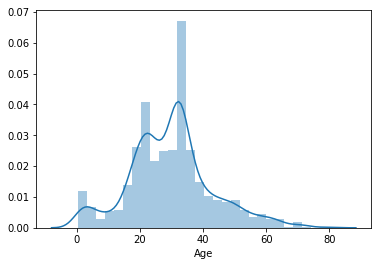

In [39]:
sns.distplot(train.Age.dropna())

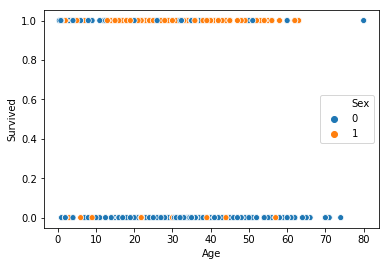

In [40]:
sns.scatterplot(x=train.Age, y=train.Survived, hue=train.Sex)

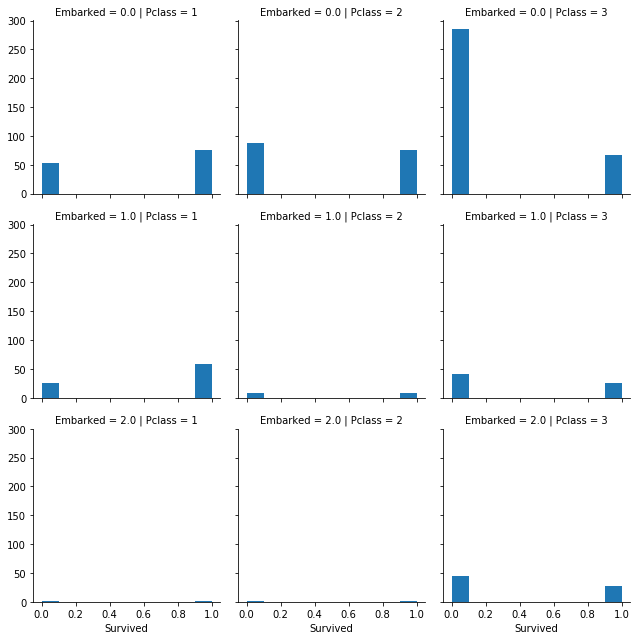

In [41]:
g= sns.FacetGrid(data = train, row = 'Embarked', col='Pclass')
g.map(plt.hist, "Survived")

**Graph I added**

Surviving rate based on age group

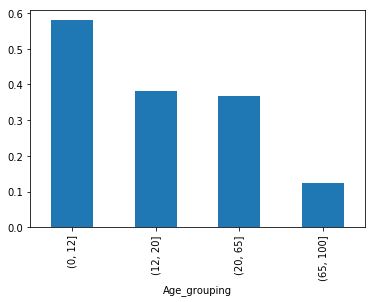

In [42]:
Survive_by_age_group.plot('bar')

Relationship between Embarked, Survived with Sex. From the graph below, We can see women are much easier to survive.

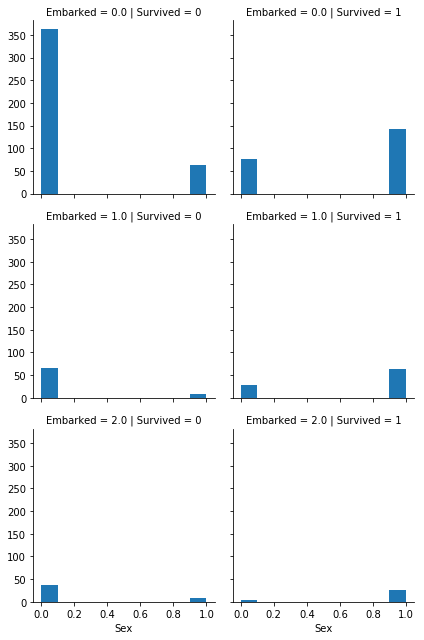

In [43]:
g=sns.FacetGrid(train,row='Embarked', col='Survived')
g.map(plt.hist,'Sex')

Relationship between Embarked, Survived with Age. From the graph below, We can see Pclass=1's people are easier to survived with all age. People are less likely to survive in Class3.

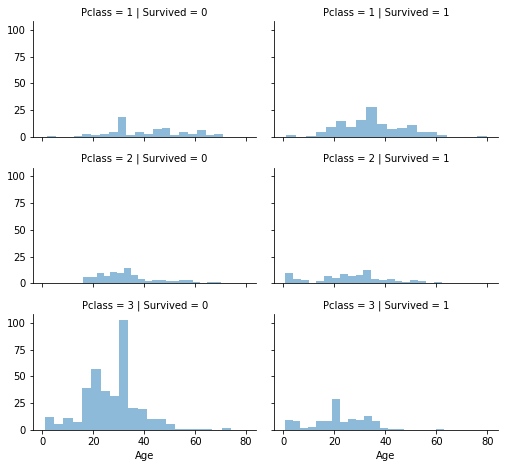

In [44]:
#Code from W5 Lecture
grid = sns.FacetGrid(train, col = 'Survived', row = 'Pclass', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5 , bins=20)
grid.add_legend()


Here is a graph that directly show the relationship between Class and Surviving possibility. From here, we can see most people in Class 1 survive, and most people in Class 3 died.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

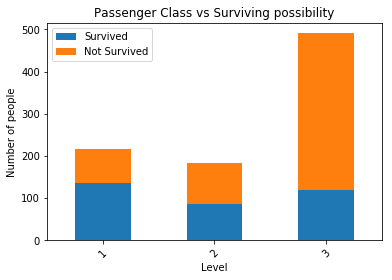

In [45]:
fig = plt.figure()
Survived_0 = train.Pclass[train.Survived == 0].value_counts()
Survived_1 = train.Pclass[train.Survived == 1].value_counts()
df = pd.DataFrame({'Survived':Survived_1, 'Not Survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title('Passenger Class vs Surviving possibility')
plt.xlabel('Level') 
plt.ylabel('Number of people') 
plt.xticks(rotation = 45)


The graph below shows that people with Miss, Mrs and Master as title are easier to survive. It again prove that women are easier to survive. In addition, higher social status can also improve the surviving rate

<Figure size 432x288 with 0 Axes>

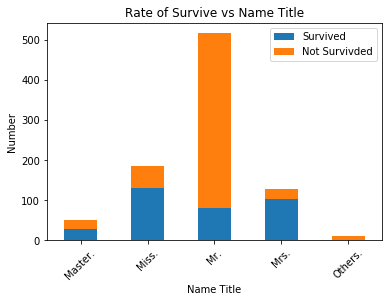

In [46]:
fig = plt.figure()
fig.set(alpha=0.2) #set color

Survived_0 = train.titles[train.Survived == 0].value_counts()
Survived_1 = train.titles[train.Survived == 1].value_counts()
df=pd.DataFrame({'Survived':Survived_1, 'Not Survivded':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title('Rate of Survive vs Name Title')
plt.xlabel('Name Title') 
plt.ylabel('Number') 
plt.xticks(rotation = 45)
plt.show()


Those graphs below basically show the relationship between class and age and their surviving possibility. In all three class, younger people are easier to survive. I also made a violin plot in addition to box plot in order to represent those data better.

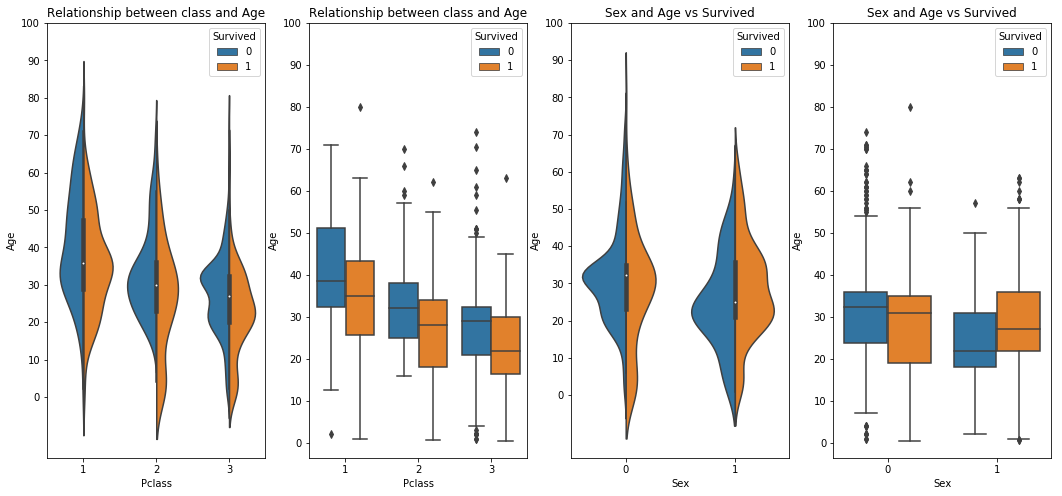

In [47]:
fig, ax = plt.subplots(1, 4, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Relationship between class and Age')
ax[0].set_yticks(range(0, 110, 10))

sns.boxplot("Pclass", "Age", hue="Survived", data=train, ax=ax[1])
ax[1].set_title('Relationship between class and Age')
ax[1].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=train, split=True, ax=ax[2])
ax[2].set_title('Sex and Age vs Survived')
ax[2].set_yticks(range(0, 110, 10))

sns.boxplot("Sex", "Age", hue="Survived", data=train, ax=ax[3])
ax[3].set_title('Sex and Age vs Survived')
ax[3].set_yticks(range(0, 110, 10))



plt.show()


According to those analysis above, I strongly believe sex is the biggest factor to determine whether this person survive or not. Therefore, I'm going to compare Sex and Survive separately.

<Figure size 432x288 with 0 Axes>

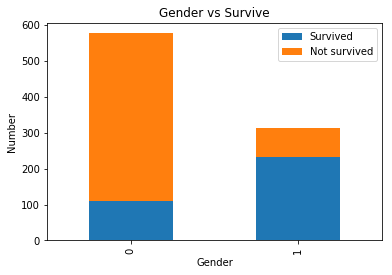

In [48]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = train.Sex[train.Survived == 0].value_counts()
Survived_1 = train.Sex[train.Survived == 1].value_counts()
df=pd.DataFrame({'Survived':Survived_1, 'Not survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title('Gender vs Survive')
plt.xlabel('Gender') 
plt.ylabel('Number')
plt.show()


Sibling is also a important factor for me. People with more siblings may get more help during this disaster. Let's see

In [49]:
with_sib = train[train['SibSp'] != 0]
non_sib = train[train['SibSp'] == 0]

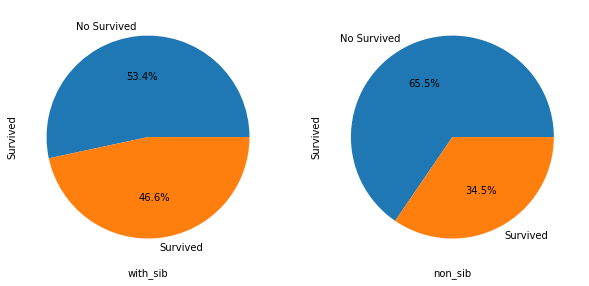

In [50]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)

with_sib['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('with_sib')

plt.subplot(1,2,2)
non_sib['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('non_sib')


plt.show()

People with sibling seems have higher surviving rate. Let's see this in detail by checking the surviving rate with the exact sibling number

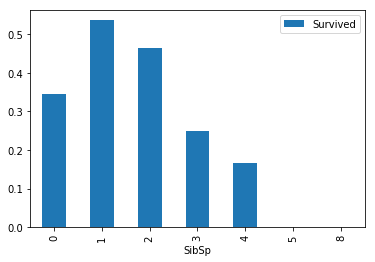

In [51]:
train[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar()

Looks like people with 1-2 sibling are easier to survive. Another factor: Parch(parent/child) is a similar factor to sibling, so let's take a look on that

In [52]:
with_parch = train[train['Parch'] != 0]
non_parch = train[train['Parch'] == 0]

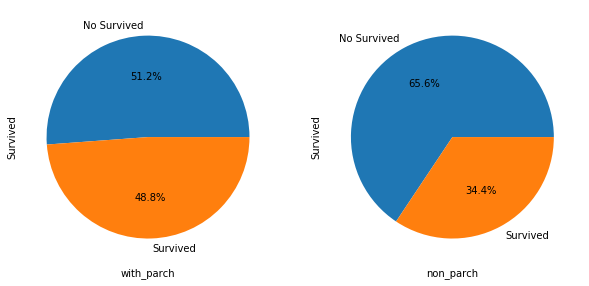

In [53]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)

with_parch['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('with_parch')


plt.subplot(1,2,2)
non_parch['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('non_parch')

plt.show()

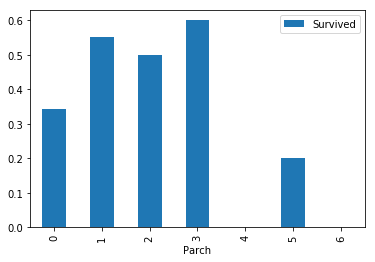

In [54]:
train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar()

It seems that 1-2 sibling/parch is good for surviving, since those 2 data have similar relationship with surviving rate, let create a family column with those 2 features added with +1 to count the person himself/herself

In [55]:
train['FamilyMember'] = train['Parch'] + train['SibSp'] + 1
test['FamilyMember'] = test['Parch'] + test['SibSp'] + 1

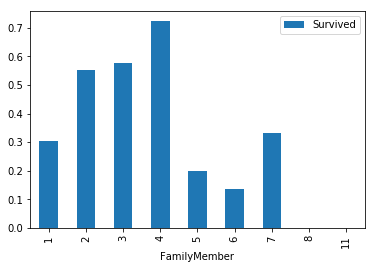

In [56]:
train[['FamilyMember','Survived']].groupby(['FamilyMember']).mean().plot.bar()

From combined family member data, we can see that family with 2-4 people are easier to survive. Less or above 2-4 both bring negative effect on surviving rate

## Analysis

In conclusion, from the data analysis above, it is easy to observe that rich people(Pclass=1), ladies(sex=1),2-4 families, and relative young people tend to survive in the end. No matter which passenger class we select, ladies are easier survived than male. Younger people and people with 1-2 family members also have higher surviving rate. I assumed people tend to let women and children go first. Also, passenger class and name title represent the passengers' social status. People with higher social status or name title also have advantages in surviving. I assume rich people went first after the titanic collided the ice mountain. Therefore, in my modeling, I will use features: Pclass,	Sex, Age, Fare, Embarked, title_group, FamilyMember. 

## Modeling
Build a linear model to predict the survived rate

In [57]:
#Since I'm not familar with Modeling, I will use some modeling in class and 
#Look tutorial as guide https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lgcls = LogisticRegression()

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,titles,title_group,Age_grouping,FamilyMember
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0,Mr.,0,"(20, 65]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0,Mrs.,2,"(20, 65]",2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0.0,Miss.,1,"(20, 65]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0.0,Mrs.,2,"(20, 65]",2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0.0,Mr.,0,"(20, 65]",1


In [61]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title_group,FamilyMember
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.759585,0.523008,0.381594,32.204208,0.361392,0.712682,1.904602
std,257.353842,0.486592,0.836071,0.477990,13.224425,1.102743,0.806057,49.693429,0.635673,0.988954,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,21.845638,0.000000,0.000000,7.910400,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.873874,1.000000,0.000000,31.000000,1.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,4.000000,11.000000


In [62]:
X_train = train[['Pclass', 'SibSp', 'Parch']]

In [63]:
X_test = test[['Pclass', 'SibSp', 'Parch']]

In [64]:
y_train = train.Survived

In [65]:
lgcls.fit(X_train, y_train)

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
pred = lgcls.predict(X_test)

**My Code Below**

### I looked https://www.kaggle.com/startupsci/titanic-data-science-solutions for some idea in modeling since I don't have much knowledge on machine learning. The 3 models I used: SVC, Decision Tree and Random Forest are following from the tutorial, and I found another 2 other prediction models called Gradient Boosting Classfication and ada boost classfication and applied in here, I also build a vote Yes to get the most voted value from those prediction by 4 models I used. The LogisticRegression model from lecture gives me relative low score, so I didn't use this in prediction


In [67]:
X_train = train.drop(["Survived","Age_grouping","titles","PassengerId","Name","Parch","SibSp"], axis=1).copy()
Y_train = train["Survived"]
X_test  = test.drop(["PassengerId","Name","titles","Age_grouping","Parch","SibSp"], axis=1).copy()

In [68]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,title_group,FamilyMember
0,3,0,22.0,7.2500,0.0,0,2
1,1,1,38.0,71.2833,1.0,2,2
2,3,1,26.0,7.9250,0.0,1,1
3,1,1,35.0,53.1000,0.0,2,2
4,3,0,35.0,8.0500,0.0,0,1


In [69]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,title_group,FamilyMember
0,3,0,34.5,7.8292,2,0,1
1,3,1,47.0,7.0000,0,2,2
2,2,0,62.0,9.6875,2,0,1
3,3,0,27.0,8.6625,0,0,1
4,3,1,22.0,12.2875,0,2,3


In [70]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


92.03

In [71]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.43

In [72]:
# Random Forest
#Since Random forest algorithm couldn't provide a constant result in each run, the outcome may looked different
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


98.43

In [73]:
#Gradient Boost Classifier
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train , Y_train)
Y_pred = gradient_boost.predict(X_test)
gradient_boost.score(X_train , Y_train )
acc_gradient_boost = round(gradient_boost.score(X_train, Y_train) * 100, 2)
acc_gradient_boost



89.56

In [74]:
#Ada Boost Classifier
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train , Y_train)
Y_pred = ada_boost.predict(X_test)
ada_boost.score(X_train , Y_train )
acc_ada_boost = round(ada_boost.score(X_train, Y_train) * 100, 2)
acc_ada_boost



84.29

In [75]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines',
              'Random Forest', 
              'Decision Tree','Gradient Boost','Ada Boost'],
    'Score': [acc_svc, acc_random_forest, 
              acc_decision_tree,acc_gradient_boost,acc_ada_boost]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,98.43
2,Decision Tree,98.43
0,Support Vector Machines,92.03
3,Gradient Boost,89.56
4,Ada Boost,84.29


## Submission

In [76]:

solutionMatrix = pd.DataFrame({#this will generate 4 column of prediction result from 5 modules 
    "Support Vector Machines":svc.predict(X_test),
    #"KNN":knn.predict(X_test),
    #"Logistic Regression":logreg.predict(X_test),
    "Ada Boost":ada_boost.predict(X_test),
    "Gradient Boost":gradient_boost.predict(X_test),
    "Decision Tree":decision_tree.predict(X_test),
    "Random Forest":random_forest.predict(X_test)

})
solutionMatrix["VoteYes"] = solutionMatrix.sum(axis=1)#create new column contain the voting result. We only need the number of "yes", since yes=1, we just take sum of 5 column
newcombine = [solutionMatrix]
for dataset in newcombine:
    dataset['Survived'] = 0
    half = np.ceil((len(solutionMatrix.columns)-2)/2)#since I create 2 more column, I need to -2 first
    dataset.loc[dataset['VoteYes'] > half, 'Survived'] = 1#If more than half of modules vote yes, decision is 1

solutionMatrix.head()
submission = pd.DataFrame({#Final submission result
        "PassengerId": test["PassengerId"],
        "Survived": solutionMatrix['Survived']
    })
submission.to_csv('./titanicSubmission.csv', index=False)
solutionMatrix.head()


,Support Vector Machines,Ada Boost,Gradient Boost,Decision Tree,Random Forest,VoteYes,Survived
0,0,0,0,0,0,0,0
1,0,1,0,1,0,2,0
2,1,0,0,0,0,1,0
3,0,0,0,1,1,2,0
4,0,1,0,1,1,3,0


In [77]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
